In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

2.1.4
1.26.4


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
sns.set_style('whitegrid')
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#2. Partie 1: Prise en main du Dataset
#2.1. Vérifier si Données Manquantes :
#Des valeurs manquantes peuvent être présentes dans certaines colonnes, par exemple, l'âge de certains passagers ..

#vérifier les valeurs manquantes des colonnes et proposer une solution pour y remédier.
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
#2.2. Vérifier si Incohérences dans les Valeurs
#Il peut y avoir des incohérences dans les données, comme des âges négatifs, des tarifs négatifs, ou des numéros de cabine incorrects..
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic_df['age']
moyen_age = titanic_df['age'].mean()
titanic_df['age'] = titanic_df['age'].fillna(moyen_age)
titanic_df['age']
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
#titanic_df['deck']
#df_tmp = titanic_df.copy()
#moyen_age = titanic_df['deck'].mean()
#df_tmp['deck'] = df_tmp['deck'].fillna(moyen_age)
#df_tmp['deck']
#df_tmp.isnull().sum()

In [73]:
titanic_df.sort_index(axis=1, ascending=False)

,who,survived,sibsp,sex,pclass,parch,fare,embarked,embark_town,deck,class,alone,alive,age,adult_male
0,man,0,1,male,3,0,7.2500,S,Southampton,NaN,Third,False,no,22.000000,True
1,woman,1,1,female,1,0,71.2833,C,Cherbourg,C,First,False,yes,38.000000,False
2,woman,1,0,female,3,0,7.9250,S,Southampton,NaN,Third,True,yes,26.000000,False
3,woman,1,1,female,1,0,53.1000,S,Southampton,C,First,False,yes,35.000000,False
4,man,0,0,male,3,0,8.0500,S,Southampton,NaN,Third,True,no,35.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,woman,0,0,female,3,5,29.1250,Q,Queenstown,NaN,Third,False,no,39.000000,False
887,woman,1,0,female,1,0,30.0000,S,Southampton,B,First,True,yes,19.000000,False
888,woman,0,1,female,3,2,23.4500,S,Southampton,NaN,Third,False,no,29.699118,False
889,man,1,0,male,1,0,30.0000,C,Cherbourg,C,First,True,yes,26.000000,True


In [9]:
#âges négatifs
titanic_df['age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [10]:
titanic_df[titanic_df['age'] < 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [11]:
#tarifs négatifs
titanic_df[titanic_df['fare'] < 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [12]:
#numéros de cabine incorrects
titanic_df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [13]:
#2.3. Verifier les données Aberrantes (Outliers)
#Des valeurs aberrantes peuvent être présentes dans certaines colonnes, par exemple, 
#des tarifs extrêmement élevés 
titanic_df['fare'].max()

512.3292

In [14]:
titanic_df['fare'].min()

0.0

In [15]:
#ou des âges très élevés.
titanic_df['age'].max()

80.0

In [16]:
titanic_df['age'].min()

0.42

In [17]:
#2.4. Vérifier les Doublons
#Il peut y avoir des lignes en double dans le dataset, ce qui signifie que les mêmes données apparaissent plusieurs fois et il faut donc les supprimer
titanic_df[titanic_df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.000000,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.000000,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
titanic_df.drop_duplicates(keep='first', inplace=True)

In [19]:
#2.5. Vérifier si colonnes Inutiles
#Certaines colonnes peuvent contenir des données redondantes ou inutiles pour l'analyse.


In [20]:
#3. Bonus
#**Continuez l'exploration du dataset Titanic avec d'autres axes d'analyse **
#

In [21]:
#1-Quelle est la répartition des passagers par classe (1ère, 2ème, 3ème) à bord du Titanic ?
#
titanic_df.groupby(['class']).count()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3048\4020626185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby(['class']).count()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,214,214,214,214,214,214,214,212,214,214,174,212,214,214
Second,165,165,165,165,165,165,165,165,165,165,16,165,165,165
Third,405,405,405,405,405,405,405,405,405,405,12,405,405,405


In [22]:
#2- Quelle est la répartition des passagers par sexe à bord du Titanic ?
#
titanic_df.groupby(['sex']).count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,293,293,293,293,293,293,291,293,293,293,96,291,293,293
male,491,491,491,491,491,491,491,491,491,491,106,491,491,491


In [23]:
#3- Quel était l'âge moyen des passagers à bord du Titanic ? Y avait-il des passagers très jeunes ou très âgés ?
#
titanic_df['age'].min()

0.42

In [24]:
titanic_df['age'].mean()

29.846334783913566

In [25]:
titanic_df['age'].max()

80.0

In [26]:
#4- Combien de passagers ont survécu au naufrage du Titanic ? Quelle était leur répartition par classe, sexe et âge ?
titanic_df.groupby(['alive']).count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
alive,,,,,,,,,,,,,,
no,461,461,461,461,461,461,461,461,461,461,461,67,461,461
yes,323,323,323,323,323,323,323,321,323,323,323,135,321,323


In [77]:
titanic_df.groupby(['class','survived'])["survived"].count()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3048\553876179.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby(['class','survived'])["survived"].count()


class   survived
First   0            79
        1           135
Second  0            81
        1            84
Third   0           301
        1           104
Name: survived, dtype: int64

In [75]:
titanic_df.groupby(['sex','survived'])["survived"].count()

sex     survived
female  0            76
        1           217
male    0           385
        1           106
Name: survived, dtype: int64

In [71]:
titanic_df.groupby(['age','survived'])["survived"].count()

age
0.42     1
0.67     1
0.75     1
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: survived, Length: 89, dtype: int64

In [27]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


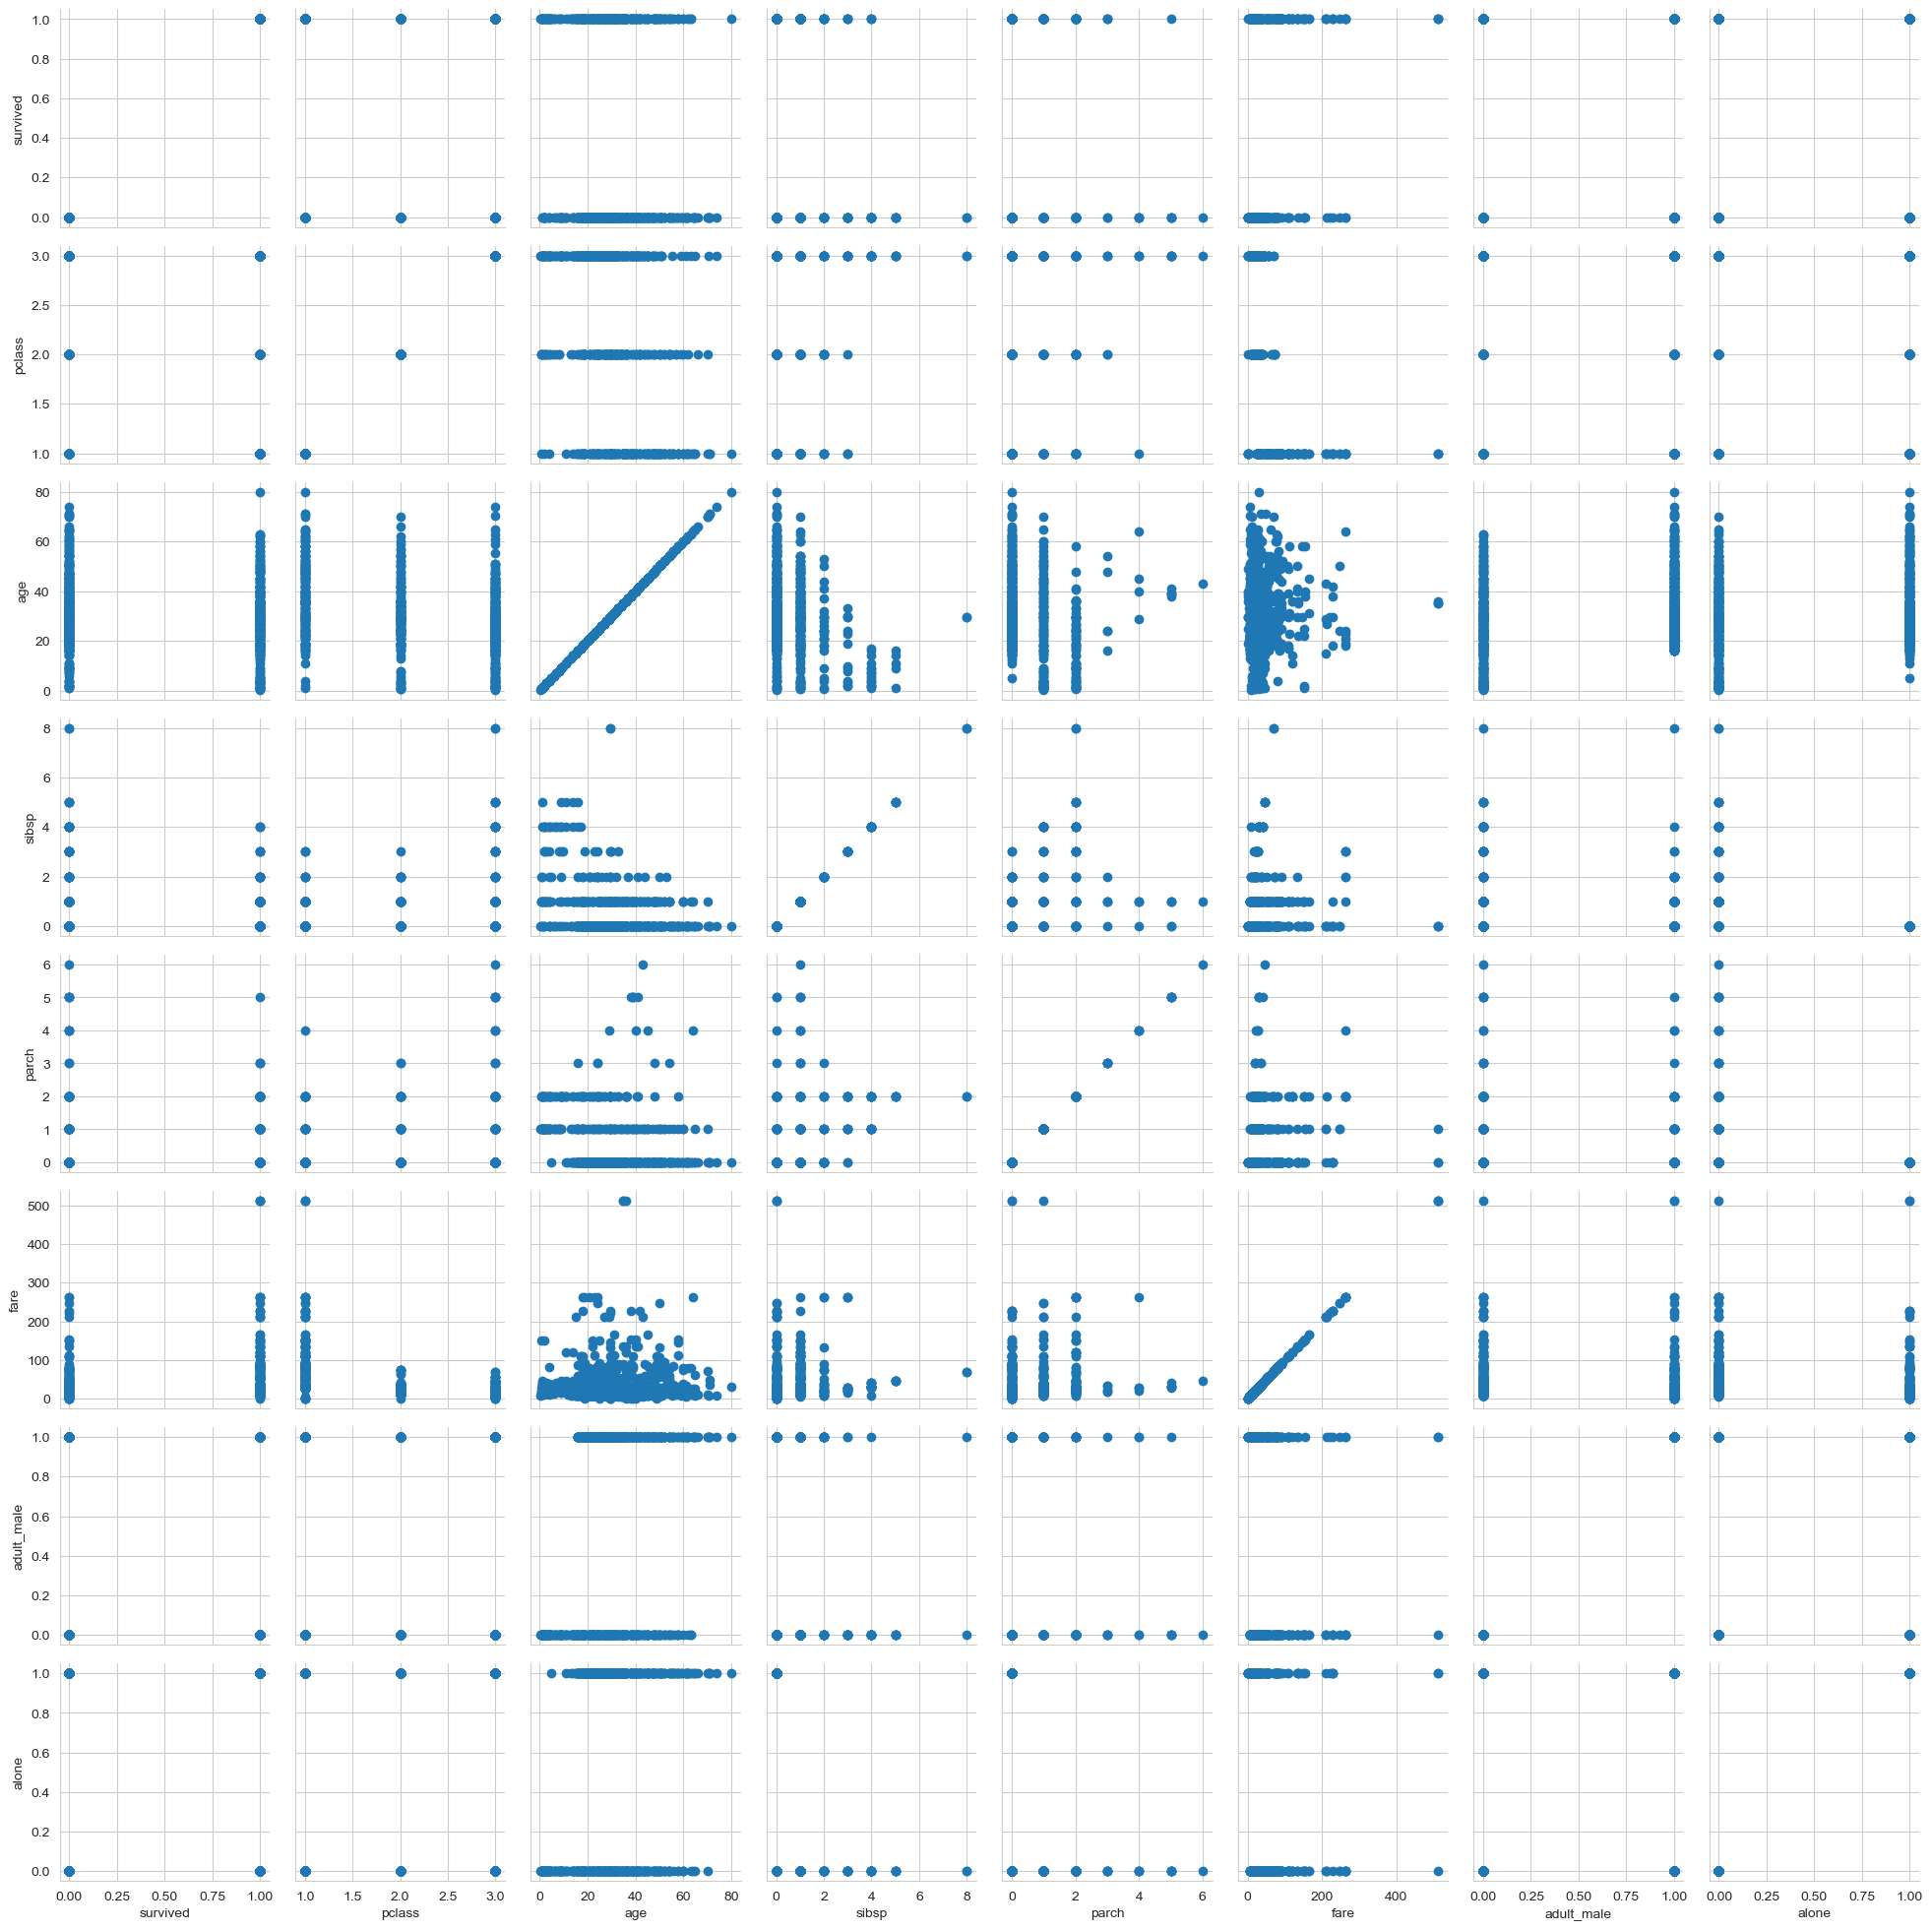

In [28]:
g = sns.PairGrid(titanic_df)
g.map(plt.scatter)

C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sex', ylabel='age'>

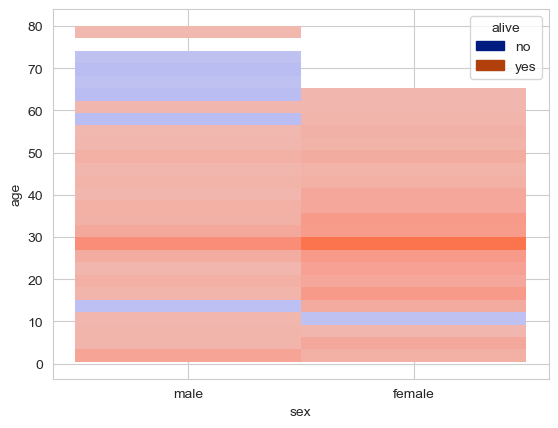

In [29]:
sns.histplot(x="sex", y="age", hue="alive",data=titanic_df, palette="dark")

C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sex', ylabel='Count'>

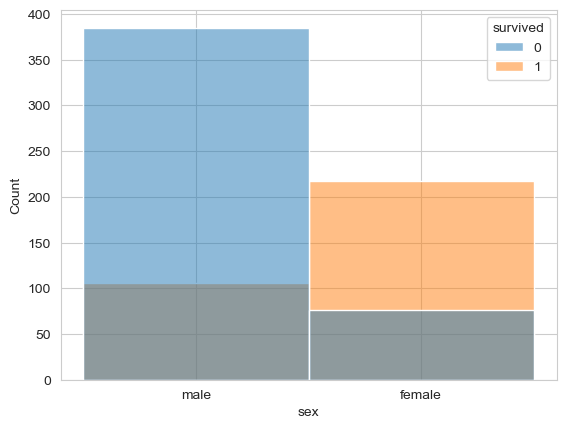

In [85]:
sns.histplot(x="sex", hue="survived",data=titanic_df)